In [1]:
import pandas as pd
import numpy as np
import pickle

import altair as alt


# importing local libraries for drawings (because they clutter)
# in Github, you can search  
#   They should still be available within the git repo but it's pretty much template stuff from altair
import sys
sys.path.append('../')
from lib.builders import people,towns,nations,culture as c
import lib.drawMaps as draw

with (open('world_1.p', 'rb')) as pickle_file:
    world = pickle.load(pickle_file)
    
world

In [2]:
culture = c.Culture()
culture.eons

10

# The age of the ancients

the terrain and all of the natural features are formed in the first age. Mountains, rivers, lakes, forrests. Once the land has settle, the first cities appear. 

Culture settings come from the user input, there are defaults for everything. Once specified the `.culture` placeholder can be replaced. It should not be used until this point. 

In [3]:
world.culture = culture

#### Blank world from the `landscape` age

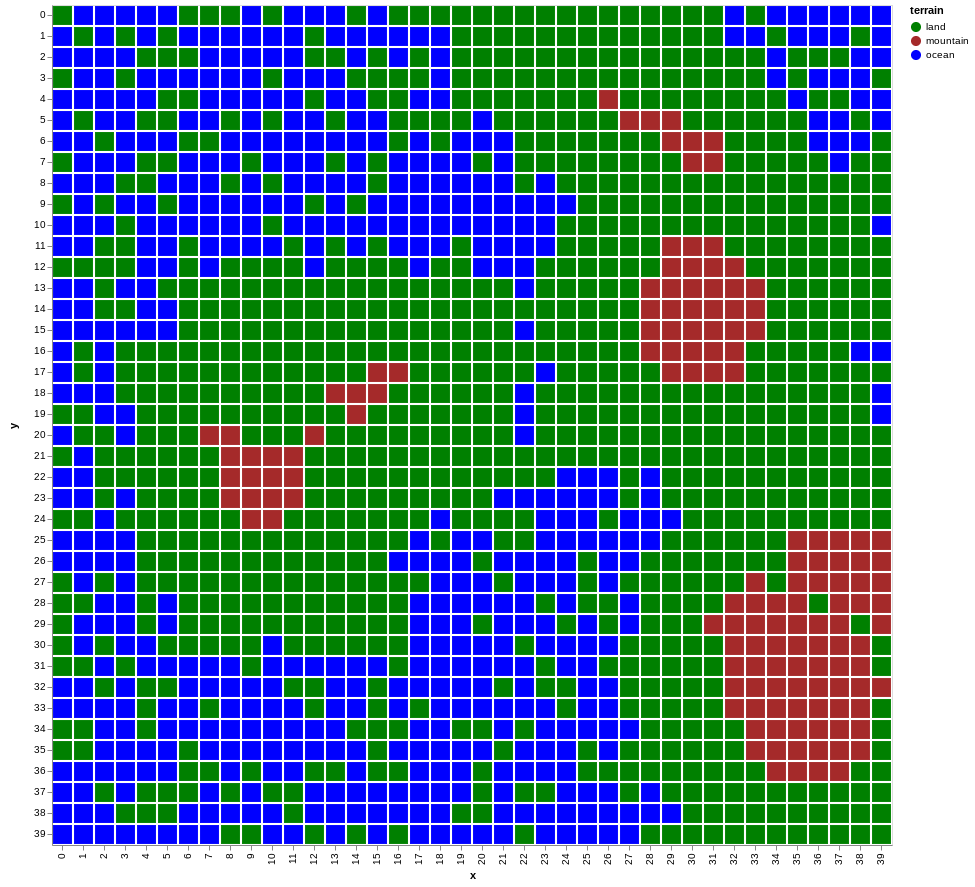

In [4]:
draw.drawTerrainTypes(world.grid_elevation,world.landscape)

the `__init__` method of a city takes a founding age and a location (which can be generated randomly via `World.get_random_chord`). The init method automatically generates a name. The default nation is the name of the town.

## People
A `Person` is a required parameter for many things like `towns`, `nations` and `buildings`

A person requires a `culture` to specify how the names will be generated. As a default the person is a `peon` and exists nowhere (`None`). Optional parameters allow the person to be created with a `role` and a `location`. `Location` can be a `town`, `building` or a `key` where the person can be found. 

In [5]:
people.Person(world.culture,location=world.get_random_chord())

Thoglunt, peon, residing in [19 32]

When a new `Town` is created it is created with a person

In [6]:
new_town = towns.Town(world.get_random_chord(),1,culture,people)
new_town

town of Brinespike: population: 1 location: [31,35] founded 1

In [7]:
new_town.speaker

Reldram, Speaker of Brinespike, residing in Brinespike

## The age of civilization

Cities grow for a set number of aeons. During each eon
* n new villages are born
* each village has g% chance to grow

at the end of this age cities merge together to become nations. 

In [8]:
all_towns = towns.build_towns(world,people)
all_towns

[town of Solhaven: population: 4 location: [23,31] founded 0,
 town of Lilykeep: population: 4 location: [5,19] founded 0,
 town of Snakelight: population: 4 location: [28,17] founded 1,
 town of Ravenblaze: population: 6 location: [3,10] founded 1,
 town of Fenvale: population: 4 location: [36,34] founded 1,
 town of Helljaw: population: 3 location: [28,19] founded 2,
 town of Brinemore: population: 5 location: [34,15] founded 2,
 town of Fallring: population: 4 location: [37,18] founded 3,
 town of Stormgarden: population: 4 location: [32,9] founded 4,
 town of Lilymoral: population: 2 location: [22,25] founded 4,
 town of Gleamvale: population: 3 location: [9,39] founded 5,
 town of Splithenge: population: 2 location: [29,0] founded 5,
 town of Leafmoral: population: 2 location: [14,28] founded 6,
 town of Founderscombe: population: 1 location: [35,39] founded 8,
 town of Heirbridge: population: 2 location: [27,19] founded 8,
 town of Ravenfellow: population: 1 location: [7,0] found

In [9]:
[p.speaker for p in all_towns]

[Chifaddort, Speaker of Solhaven, residing in Solhaven,
 Rernace, Speaker of Lilykeep, residing in Lilykeep,
 Ratoldos, Speaker of Snakelight, residing in Snakelight,
 Drocarrard, Speaker of Ravenblaze, residing in Ravenblaze,
 Bekkai, Speaker of Fenvale, residing in Fenvale,
 Rotendob, Speaker of Helljaw, residing in Helljaw,
 Roharkow, Speaker of Brinemore, residing in Brinemore,
 Sayos, Speaker of Fallring, residing in Fallring,
 Xapeltomir, Speaker of Stormgarden, residing in Stormgarden,
 Happid, Speaker of Lilymoral, residing in Lilymoral,
 Shakellor, Speaker of Gleamvale, residing in Gleamvale,
 Mospesh, Speaker of Splithenge, residing in Splithenge,
 Trachim, Speaker of Leafmoral, residing in Leafmoral,
 Urbrob, Speaker of Founderscombe, residing in Founderscombe,
 Thopartadle, Speaker of Heirbridge, residing in Heirbridge,
 Fixale, Speaker of Ravenfellow, residing in Ravenfellow]

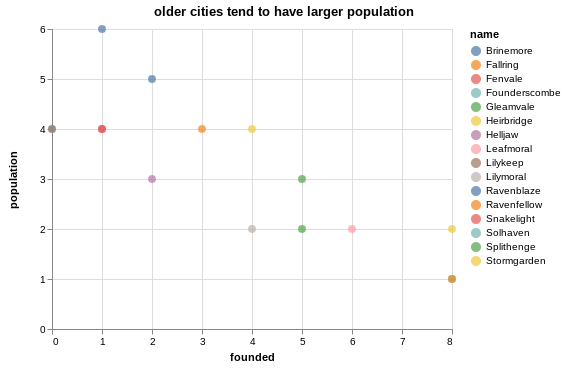

In [10]:
def population_age(towns):
    df = pd.DataFrame(index=range(len(all_towns)))
    df['name'] = [t.name for t in all_towns]
    df['population'] = [t.pop for t in all_towns]
    df['founded'] = [t.founded for t in all_towns]
    return df

alt.Chart(population_age(towns),title="older cities tend to have larger population").mark_circle(size=60).encode(
    y='population',
    x='founded',
    color='name',
    tooltip=['name']
)

There are convinience functions to fetch individual towns. 

In [11]:
towns.get_town(all_towns,all_towns[2].name)

town of Snakelight: population: 4 location: [28,17] founded 1

In [12]:
world.df_features.head()

,y,rainfall,x,key,elevation,terrain
key,,,,,,
0:0,0,7.0,0,0:0,1.0,land
1:0,0,6.0,1,1:0,-1.0,ocean
2:0,0,7.0,2,2:0,-1.0,ocean
3:0,0,12.0,3,3:0,0.0,ocean
4:0,0,11.0,4,4:0,0.0,ocean


In [13]:
world.add_features(all_towns)

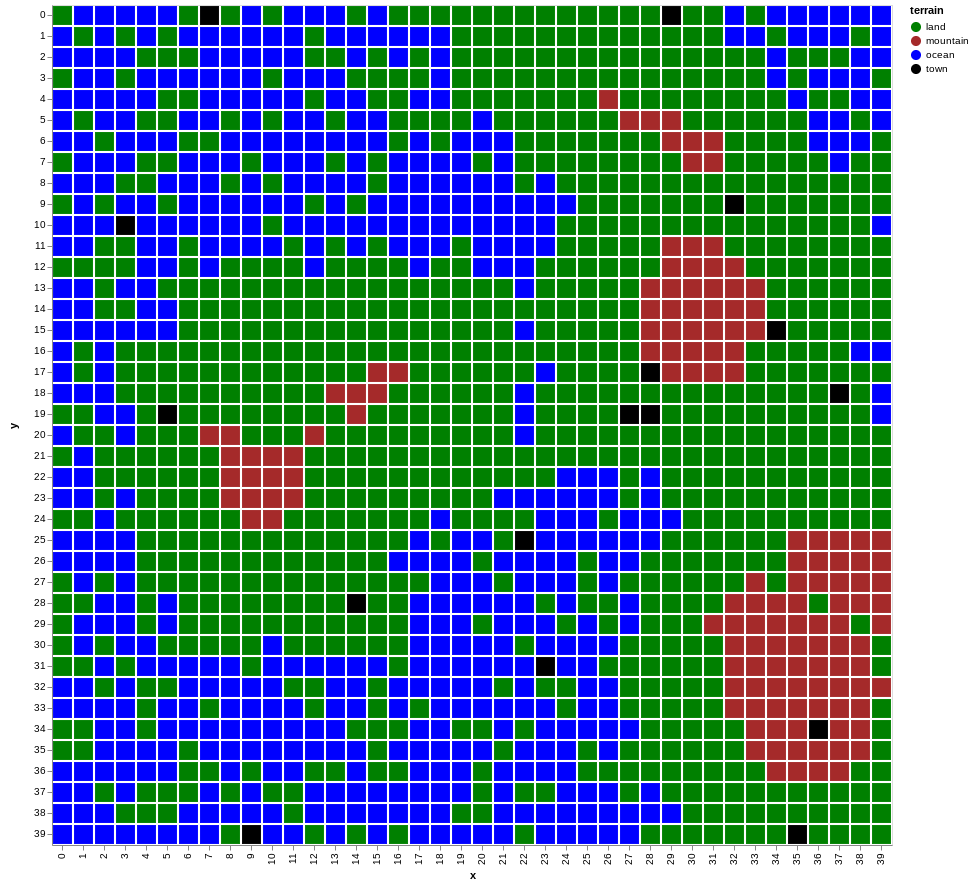

In [14]:
draw.drawCities(world.df_features)

In [15]:
world.df_features[world.df_features['feature'].isna()==False]

,y,rainfall,x,key,elevation,terrain,feature
key,,,,,,,
7:0,0,12.0,7,7:0,1.0,town,Ravenfellow
29:0,0,55.0,29,29:0,6.0,town,Splithenge
32:9,9,30.0,32,32:9,18.0,town,Stormgarden
3:10,10,20.0,3,3:10,2.0,town,Ravenblaze
34:15,15,16.0,34,34:15,16.0,town,Brinemore
28:17,17,20.0,28,28:17,20.0,town,Snakelight
37:18,18,1.0,37,37:18,1.0,town,Fallring
5:19,19,33.0,5,5:19,12.0,town,Lilykeep
27:19,19,9.0,27,27:19,9.0,town,Heirbridge


In [16]:
#k is the actual k_means cluster object.
all_nations,k = nations.cluster_nations(world)

world.nations = all_nations

all_nations

{0: 'Lionmelt',
 1: 'Badgerblaze',
 2: 'Snakemain',
 3: 'Malcoil',
 4: 'Heirhammer',
 5: 'Camjaw',
 6: 'Leafplace',
 7: 'Kingsspring'}

In [17]:
k

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
world.df_features = nations.predict_nations(k,world)
world.df_features.head(20)

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
0:0,0,7.0,0,0:0,1.0,land,NaN,7.0,Kingsspring
1:0,0,6.0,1,1:0,-1.0,ocean,NaN,NaN,NaN
2:0,0,7.0,2,2:0,-1.0,ocean,NaN,NaN,NaN
3:0,0,12.0,3,3:0,0.0,ocean,NaN,NaN,NaN
4:0,0,11.0,4,4:0,0.0,ocean,NaN,NaN,NaN
5:0,0,11.0,5,5:0,0.0,ocean,NaN,NaN,NaN
6:0,0,11.0,6,6:0,1.0,land,NaN,7.0,Kingsspring
7:0,0,12.0,7,7:0,1.0,town,Ravenfellow,7.0,Kingsspring
8:0,0,18.0,8,8:0,1.0,land,NaN,7.0,Kingsspring


In [19]:
world.towns

In [20]:
world.towns = all_towns
for t in all_towns:
    try:
        t.set_starting_fielty(world)
    except:
        continue
        
town = world.towns[1]
print(f"{town.name} is loyal to the nation of {town.nation}")
print(f"{town.diplomacy}")

Lilykeep is loyal to the nation of Lionmelt
{'nation': 'Lionmelt', 'national fealty': 1}


In [21]:
#for each nation (n), appoint the most populus city (c) as it's capitol.
for n in np.unique(world.df_features['nation'].dropna()):
    c = world.df_features[(world.df_features['nation']==n)& \
          (world.df_features['terrain']=='town')]['feature'].tolist()
    #getting the town objects
    ts = [t for t in all_towns if t.name in c]
    #get population(p)
    p = [t.pop for t in ts]
    #getting the first town that has the max population, make that the capitol
    ts[np.argmax(p)].type='capitol'
    
all_towns

[capitol of Solhaven: population: 4 location: [23,31] founded 0,
 town of Lilykeep: population: 4 location: [5,19] founded 0,
 capitol of Snakelight: population: 4 location: [28,17] founded 1,
 capitol of Ravenblaze: population: 6 location: [3,10] founded 1,
 capitol of Fenvale: population: 4 location: [36,34] founded 1,
 town of Helljaw: population: 3 location: [28,19] founded 2,
 capitol of Brinemore: population: 5 location: [34,15] founded 2,
 town of Fallring: population: 4 location: [37,18] founded 3,
 town of Stormgarden: population: 4 location: [32,9] founded 4,
 town of Lilymoral: population: 2 location: [22,25] founded 4,
 capitol of Gleamvale: population: 3 location: [9,39] founded 5,
 capitol of Splithenge: population: 2 location: [29,0] founded 5,
 town of Leafmoral: population: 2 location: [14,28] founded 6,
 town of Founderscombe: population: 1 location: [35,39] founded 8,
 town of Heirbridge: population: 2 location: [27,19] founded 8,
 capitol of Ravenfellow: population:

In [22]:
world.nations = [nations.Nation(n,world,world.culture,people) for n in world.nations.values()]
world.nations

[Nation of Lionmelt,
 Nation of Badgerblaze,
 Nation of Snakemain,
 Nation of Malcoil,
 Nation of Heirhammer,
 Nation of Camjaw,
 Nation of Leafplace,
 Nation of Kingsspring]

In [23]:
world.nations[0].ruler

Bovallnan, Ruler of the nation of Lionmelt, residing in Ravenblaze

In [24]:
world.df_features[world.df_features['feature'].isna()==False].sort_values(['nation'])

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
22:25,25,2.0,22,22:25,2.0,town,Lilymoral,1.0,Badgerblaze
14:28,28,19.0,14,14:28,3.0,town,Leafmoral,1.0,Badgerblaze
23:31,31,1.0,23,23:31,1.0,town,Solhaven,1.0,Badgerblaze
9:39,39,3.0,9,9:39,1.0,town,Gleamvale,5.0,Camjaw
32:9,9,30.0,32,32:9,18.0,town,Stormgarden,4.0,Heirhammer
34:15,15,16.0,34,34:15,16.0,town,Brinemore,4.0,Heirhammer
37:18,18,1.0,37,37:18,1.0,town,Fallring,4.0,Heirhammer
7:0,0,12.0,7,7:0,1.0,town,Ravenfellow,7.0,Kingsspring
28:17,17,20.0,28,28:17,20.0,town,Snakelight,6.0,Leafplace


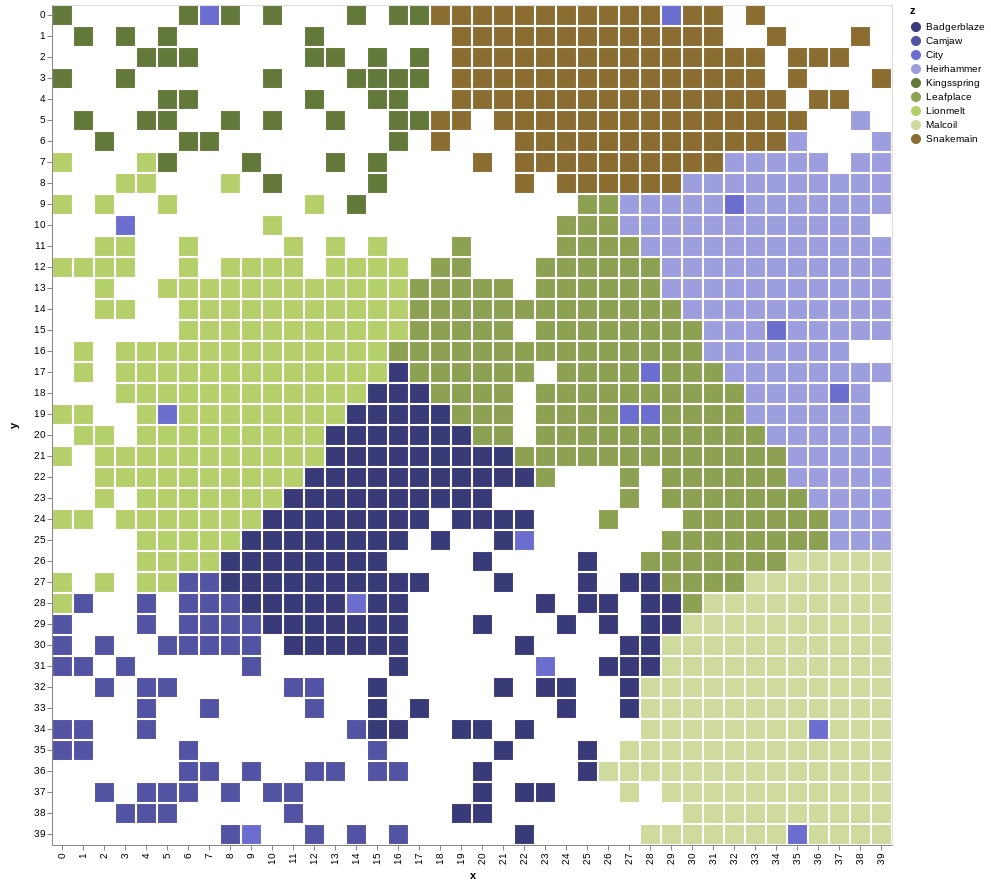

In [25]:
draw.drawboarders(world.df_features)

In [26]:
world.towns = all_towns

with open('world_2.p', 'wb') as pickle_file:
    pickle.dump(world, pickle_file)